In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
import pandas.util.testing as tm
from scipy.stats import spearmanr
import statsmodels.api as sm

In [48]:
df = pd.read_csv("50states_covid-19 race data.csv", index_col = 0)
df.head()

,Total_confirmed,White_confirmed,Black or African American_confirmed,Hispanic_confirmed,Asian_confirmed,American Indian and Alaska Native_confirmed,Native Hawaiian and Other Pacific Islander_confirmed,Total population,Hispanic,White,Black or African American,American Indian and Alaska Native,Asian,Asian Indian,Native Hawaiian and Other Pacific Islander
State,,,,,,,,,,,,,,,
Alabama,53587,18094,17650,4846,216,0,0,4887871,204800,3306838,1307040,22063,65095,14401,1797
Alaska,1479,633,35,87,63,177,39,737438,50200,474555,25197,111371,46381,1376,7958
Arizona,122467,19895,2709,28514,913,7783,0,7171646,2213600,5590505,336340,330599,237873,58926,15661
Arkansas,28367,13542,6042,6851,395,74,1743,3013825,224900,2306096,456714,20951,47548,9581,9398
California,320804,36481,9021,112854,12473,446,1243,39557045,15261300,23535388,2283850,302792,5821585,815948,155739


In [49]:
df.columns

Index(['Total_confirmed', 'White_confirmed',
       'Black or African American_confirmed', 'Hispanic_confirmed',
       'Asian_confirmed', 'American Indian and Alaska Native_confirmed',
       'Native Hawaiian and Other Pacific Islander_confirmed',
       'Total population', 'Hispanic', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian', 'Asian Indian',
       'Native Hawaiian and Other Pacific Islander'],
      dtype='object')

In [50]:
df = df.fillna(0)

In [51]:
df.astype('int64').dtypes

Total_confirmed                                         int64
White_confirmed                                         int64
Black or African American_confirmed                     int64
Hispanic_confirmed                                      int64
Asian_confirmed                                         int64
American Indian and Alaska Native_confirmed             int64
Native Hawaiian and Other Pacific Islander_confirmed    int64
Total population                                        int64
Hispanic                                                int64
White                                                   int64
Black or African American                               int64
American Indian and Alaska Native                       int64
Asian                                                   int64
Asian Indian                                            int64
Native Hawaiian and Other Pacific Islander              int64
dtype: object

In [188]:
spearmanr(df['Total_confirmed'], df['White_confirmed'])

SpearmanrResult(correlation=0.8940795559666975, pvalue=2.6470368929040484e-17)

In [53]:
spearmanr(df['Total_confirmed'], df['Black or African American_confirmed'])

SpearmanrResult(correlation=0.85395467160037, pvalue=2.351366915363841e-14)

In [54]:
spearmanr(df['Total_confirmed'], df['Hispanic_confirmed'])

SpearmanrResult(correlation=0.8641554165098161, pvalue=5.1587915468451e-15)

In [55]:
spearmanr(df['Total_confirmed'], df['Asian_confirmed'])

SpearmanrResult(correlation=0.6442658299550229, pvalue=1.0264866544989807e-06)

In [56]:
spearmanr(df['Total_confirmed'], df['American Indian and Alaska Native_confirmed'])

SpearmanrResult(correlation=-0.05713385711012333, pvalue=0.702865980344029)

In [57]:
spearmanr(df['Total_confirmed'], df['Native Hawaiian and Other Pacific Islander_confirmed'])

SpearmanrResult(correlation=0.007449225891821669, pvalue=0.9603656056733734)

# cases per population

In [189]:
per_df = pd.DataFrame()
per_df['tot_pop'] = df['Total population']
per_df['Total_confirmed'] = (df['Total_confirmed']/per_df['tot_pop']) * 100
per_df

,tot_pop,Total_confirmed
State,,
Alabama,4887871,1.096326
Alaska,737438,0.200559
Arizona,7171646,1.707655
Arkansas,3013825,0.941229
California,39557045,0.810991
Colorado,5695564,0.648101
Connecticut,3572665,1.323578
Delaware,967171,1.323861
Florida,21299325,1.266758


In [197]:
per_df['White_confirmed'] = df['White_confirmed']/df['White']
per_df['Hispanic_confirmed'] = df['Hispanic_confirmed']/df['Hispanic']
per_df['Black or African American_confirmed'] = df['Black or African American_confirmed']/df['Black or African American']
per_df['Asian_confirmed'] = df['Asian_confirmed']/df['Asian']
per_df['American Indian and Alaska Native_confirmed'] = df['American Indian and Alaska Native_confirmed']/df['American Indian and Alaska Native']
per_df['Native Hawaiian and Other Pacific Islander_confirmed'] =df['Native Hawaiian and Other Pacific Islander_confirmed']/ df['Native Hawaiian and Other Pacific Islander']

In [198]:
spearmanr(per_df['Total_confirmed'], per_df['White_confirmed'])

SpearmanrResult(correlation=0.7296484736355227, pvalue=5.949425555944898e-09)

In [199]:
spearmanr(per_df['Total_confirmed'], per_df['Hispanic_confirmed'])

SpearmanrResult(correlation=0.6553149665945575, pvalue=5.777616392203088e-07)

In [200]:
spearmanr(per_df['Total_confirmed'], per_df['Black or African American_confirmed'])

SpearmanrResult(correlation=0.4535152636447734, pvalue=0.0013671424812341175)

In [201]:
spearmanr(per_df['Total_confirmed'], per_df['Asian_confirmed'])

SpearmanrResult(correlation=0.2161818377353569, pvalue=0.14443275740502992)

In [202]:
spearmanr(per_df['Total_confirmed'], per_df['American Indian and Alaska Native_confirmed'])

SpearmanrResult(correlation=-0.007876007598645205, pvalue=0.9580968320718212)

In [203]:
spearmanr(per_df['Total_confirmed'], per_df['Native Hawaiian and Other Pacific Islander_confirmed'])

SpearmanrResult(correlation=-0.11315117259818776, pvalue=0.44888582687425727)

# OLS - Ordinary Least Squares Method

In [72]:
import statsmodels.api as sm
import numpy as np

In [229]:
# Y = per_df['case_per']
# X = per_df['white']
# X = sm.add_constant(X)
model = sm.OLS(per_df['Total_confirmed'],per_df['White_confirmed'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        White_confirmed   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              344.9
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                    5.26e-23
Time:                        19:02:35   Log-Likelihood:                          241.99
No. Observations:                  47   AIC:                                     -482.0
Df Residuals:                      46   BIC:                                     -480.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Total_confirmed     0.0041      0.000     18.571      0.000       0.004       0.005
==============================================================================
Omnibus:                        4.933   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.737
Skew:                          -0.610   Prob(JB):                        0.154
Kurtosis:                       3.647   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
model = sm.OLS(per_df['Total_confirmed'],per_df['Hispanic_confirmed'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Total_confirmed   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                              154.3
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                    2.66e-16
Time:                        18:56:00   Log-Likelihood:                         -28.916
No. Observations:                  47   AIC:                                      59.83
Df Residuals:                      46   BIC:                                      61.68
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Hispanic_confirmed    38.7403      3.118     12.424      0.000      32.464      45.017
==============================================================================
Omnibus:                        3.018   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.169
Skew:                           0.511   Prob(JB):                        0.338
Kurtosis:                       3.249   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
model = sm.OLS(per_df['Total_confirmed'],per_df['Black or African American_confirmed'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Total_confirmed   R-squared (uncentered):                   0.581
Model:                            OLS   Adj. R-squared (uncentered):              0.572
Method:                 Least Squares   F-statistic:                              63.90
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                    3.02e-10
Time:                        18:56:06   Log-Likelihood:                         -43.027
No. Observations:                  47   AIC:                                      88.05
Df Residuals:                      46   BIC:                                      89.90
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Black or African American_confirmed    45.6124      5.706      7.994      0.000      34.127      57.098
==============================================================================
Omnibus:                       24.787   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.139
Skew:                          -1.483   Prob(JB):                     2.14e-11
Kurtosis:                       7.037   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
model = sm.OLS(per_df['Total_confirmed'],per_df['Asian_confirmed'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Total_confirmed   R-squared (uncentered):                   0.334
Model:                            OLS   Adj. R-squared (uncentered):              0.320
Method:                 Least Squares   F-statistic:                              23.10
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                    1.68e-05
Time:                        18:56:31   Log-Likelihood:                         -53.932
No. Observations:                  47   AIC:                                      109.9
Df Residuals:                      46   BIC:                                      111.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Asian_confirmed    52.5928     10.943      4.806      0.000      30.566      74.620
==============================================================================
Omnibus:                       11.558   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               17.264
Skew:                          -0.699   Prob(JB):                     0.000178
Kurtosis:                       5.619   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
model = sm.OLS(per_df['Total_confirmed'],per_df['American Indian and Alaska Native_confirmed'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Total_confirmed   R-squared (uncentered):                   0.219
Model:                            OLS   Adj. R-squared (uncentered):              0.202
Method:                 Least Squares   F-statistic:                              12.86
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                    0.000808
Time:                        18:56:43   Log-Likelihood:                         -57.699
No. Observations:                  47   AIC:                                      117.4
Df Residuals:                      46   BIC:                                      119.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
American Indian and Alaska Native_confirmed    28.2056      7.864      3.587      0.001      12.377      44.035
==============================================================================
Omnibus:                        5.291   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                5.680
Skew:                          -0.297   Prob(JB):                       0.0584
Kurtosis:                       4.596   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
model = sm.OLS(per_df['Total_confirmed'],per_df['Native Hawaiian and Other Pacific Islander_confirmed'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Total_confirmed   R-squared (uncentered):                   0.138
Model:                            OLS   Adj. R-squared (uncentered):              0.120
Method:                 Least Squares   F-statistic:                              7.382
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                     0.00925
Time:                        18:56:52   Log-Likelihood:                         -59.996
No. Observations:                  47   AIC:                                      122.0
Df Residuals:                      46   BIC:                                      123.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Native Hawaiian and Other Pacific Islander_confirmed    10.0471      3.698      2.717      0.009       2.604      17.491
==============================================================================
Omnibus:                        2.634   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                1.918
Skew:                          -0.001   Prob(JB):                        0.383
Kurtosis:                       3.990   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Traning a Linear Regression Model for White race

In [99]:
df=df.astype({'White_confirmed': 'int32', 'White_confirmed': 'int32'})

(array([15.,  7.,  7.,  5.,  5.,  4.,  3.,  0.,  0.,  1.]),
 array([  205. ,  5817.1, 11429.2, 17041.3, 22653.4, 28265.5, 33877.6,
        39489.7, 45101.8, 50713.9, 56326. ]),
 <a list of 10 Patch objects>)

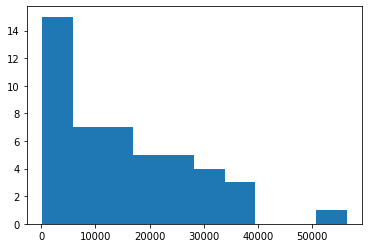

In [211]:
 plt.hist(x = df["White_confirmed"])

(array([22., 11.,  6.,  3.,  1.,  1.,  0.,  0.,  2.,  1.]),
 array([  1220. ,  33178.4,  65136.8,  97095.2, 129053.6, 161012. ,
        192970.4, 224928.8, 256887.2, 288845.6, 320804. ]),
 <a list of 10 Patch objects>)

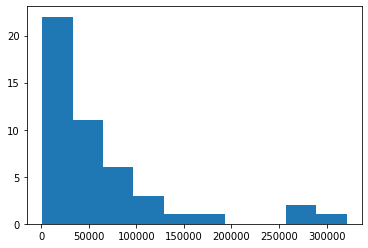

In [210]:
 plt.hist(x = df['Total_confirmed'])

In [275]:
x= df[['White_confirmed']]
y= df[['Total_confirmed']]

In [276]:
x.columns

Index(['White_confirmed'], dtype='object')

In [277]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[18094.]
 [  633.]
 [19895.]
 [13542.]
 [36481.]
 [11400.]
 [16610.]
 [ 4135.]
 [56326.]
 [27669.]
 [  205.]
 [ 5355.]
 [33468.]
 [23494.]
 [22632.]
 [11964.]
 [ 9876.]
 [ 2127.]
 [14797.]
 [34076.]
 [30909.]
 [17997.]
 [ 9752.]
 [12322.]
 [ 1057.]
 [12100.]
 [ 4480.]
 [ 3740.]
 [37558.]
 [ 1911.]
 [32417.]
 [31118.]
 [11379.]
 [ 4760.]
 [28200.]
 [ 4616.]
 [18552.]
 [ 2716.]
 [25886.]
 [ 6335.]
 [10959.]
 [ 1068.]
 [15385.]
 [10048.]
 [ 3343.]
 [23372.]
 [  864.]]


In [278]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[ 53587.]
 [  1479.]
 [122467.]
 [ 28367.]
 [320804.]
 [ 36913.]
 [ 47287.]
 [ 12804.]
 [269811.]
 [116926.]
 [  1220.]
 [ 10902.]
 [155048.]
 [ 51612.]
 [ 35712.]
 [ 18611.]
 [ 19389.]
 [  3539.]
 [ 73109.]
 [111597.]
 [ 76776.]
 [ 42281.]
 [ 35419.]
 [ 27433.]
 [  1758.]
 [ 21172.]
 [ 27683.]
 [  6054.]
 [175298.]
 [ 15028.]
 [ 85701.]
 [ 65592.]
 [ 20235.]
 [ 11454.]
 [ 92148.]
 [ 17312.]
 [ 56648.]
 [  7499.]
 [ 61960.]
 [258658.]
 [ 29484.]
 [  1296.]
 [ 70670.]
 [ 39218.]
 [  4244.]
 [ 39877.]
 [  1862.]]


# Train Test and Split the data

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [281]:
from sklearn.linear_model import LinearRegression

In [282]:
lm = LinearRegression()

In [283]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Print out the coefficients of the model

In [284]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.60823392]]


# Predicting Test Data

In [285]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

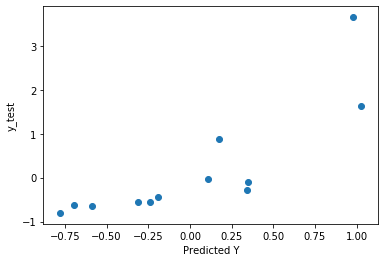

In [286]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the Model

In [287]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5159982320933759
MSE: 0.7436138888793652
RMSE: 0.8623304986369004


# Residuals

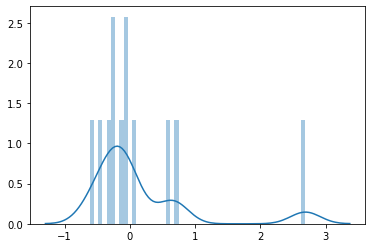

In [288]:
sns.distplot((y_test-predictions),bins=51);

In [289]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
White_confirmed,0.608234


In [117]:
df.columns

Index(['Total_confirmed', 'White_confirmed',
       'Black or African American_confirmed', 'Hispanic_confirmed',
       'Asian_confirmed', 'American Indian and Alaska Native_confirmed',
       'Native Hawaiian and Other Pacific Islander_confirmed',
       'Total population', 'Hispanic', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian', 'Asian Indian',
       'Native Hawaiian and Other Pacific Islander'],
      dtype='object')

# Linear Regression Model for Black or African American race

In [441]:
 df=df.astype({'Black or African American_confirmed': 'int32', 'Black or African American_confirmed': 'int32'})

(array([25.,  5.,  4.,  4.,  4.,  2.,  1.,  0.,  1.,  1.]),
 array([7.00000e+00, 3.83980e+03, 7.67260e+03, 1.15054e+04, 1.53382e+04,
        1.91710e+04, 2.30038e+04, 2.68366e+04, 3.06694e+04, 3.45022e+04,
        3.83350e+04]),
 <a list of 10 Patch objects>)

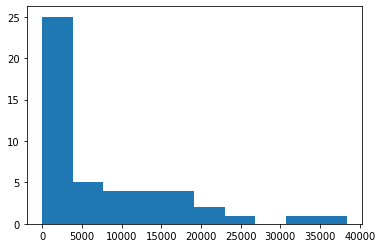

In [442]:
plt.hist(x = df["Black or African American_confirmed"])

(array([22., 11.,  6.,  3.,  1.,  1.,  0.,  0.,  2.,  1.]),
 array([  1220. ,  33178.4,  65136.8,  97095.2, 129053.6, 161012. ,
        192970.4, 224928.8, 256887.2, 288845.6, 320804. ]),
 <a list of 10 Patch objects>)

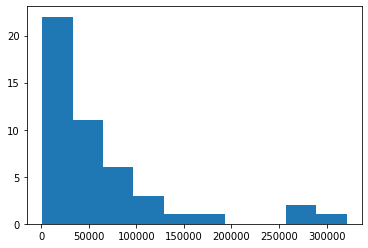

In [443]:
plt.hist(x = df["Total_confirmed"])

In [444]:
x = df[['Black or African American_confirmed']]
y = df[['Total_confirmed']]

In [445]:
x.columns

Index(['Black or African American_confirmed'], dtype='object')

In [446]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[1.7650e+04]
 [3.5000e+01]
 [2.7090e+03]
 [6.0420e+03]
 [9.0210e+03]
 [1.7360e+03]
 [6.1890e+03]
 [3.2660e+03]
 [3.8335e+04]
 [3.0945e+04]
 [1.0000e+01]
 [1.5000e+02]
 [2.5828e+04]
 [6.0990e+03]
 [3.1820e+03]
 [1.4740e+03]
 [1.8010e+03]
 [8.1600e+02]
 [2.1160e+04]
 [1.0493e+04]
 [2.1485e+04]
 [8.6650e+03]
 [1.6759e+04]
 [6.9950e+03]
 [7.0000e+00]
 [1.3000e+03]
 [1.2610e+03]
 [3.0900e+02]
 [1.7880e+04]
 [2.8400e+02]
 [1.3921e+04]
 [1.7437e+04]
 [1.5300e+03]
 [4.8500e+02]
 [1.1900e+04]
 [1.5920e+03]
 [1.2905e+04]
 [9.8500e+02]
 [1.2551e+04]
 [2.9140e+03]
 [7.4700e+02]
 [1.4300e+02]
 [1.0773e+04]
 [1.5200e+03]
 [2.9800e+02]
 [6.4620e+03]
 [1.9000e+01]]


In [447]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[1.7650e+04]
 [3.5000e+01]
 [2.7090e+03]
 [6.0420e+03]
 [9.0210e+03]
 [1.7360e+03]
 [6.1890e+03]
 [3.2660e+03]
 [3.8335e+04]
 [3.0945e+04]
 [1.0000e+01]
 [1.5000e+02]
 [2.5828e+04]
 [6.0990e+03]
 [3.1820e+03]
 [1.4740e+03]
 [1.8010e+03]
 [8.1600e+02]
 [2.1160e+04]
 [1.0493e+04]
 [2.1485e+04]
 [8.6650e+03]
 [1.6759e+04]
 [6.9950e+03]
 [7.0000e+00]
 [1.3000e+03]
 [1.2610e+03]
 [3.0900e+02]
 [1.7880e+04]
 [2.8400e+02]
 [1.3921e+04]
 [1.7437e+04]
 [1.5300e+03]
 [4.8500e+02]
 [1.1900e+04]
 [1.5920e+03]
 [1.2905e+04]
 [9.8500e+02]
 [1.2551e+04]
 [2.9140e+03]
 [7.4700e+02]
 [1.4300e+02]
 [1.0773e+04]
 [1.5200e+03]
 [2.9800e+02]
 [6.4620e+03]
 [1.9000e+01]]


# Train Test and Split the data

In [1]:
from sklearn.model_selection import train_test_split

In [448]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [449]:
lm = LinearRegression()

In [450]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [451]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.66835434]]


# Predicting Test Data

In [452]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

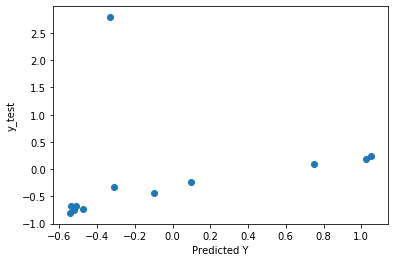

In [453]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating The Model

In [454]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.59512227557715
MSE: 0.9991078174247042
RMSE: 0.9995538091692234


# Residuals

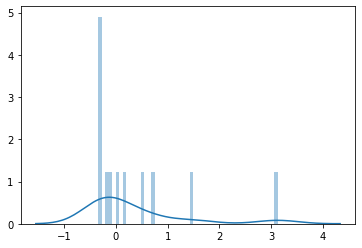

In [318]:
sns.distplot((y_test-predictions),bins=51);

In [319]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Black or African American_confirmed,0.456494


# Linear Regression Model for Hispanic race

In [335]:
 df=df.astype({'Hispanic_confirmed': 'int32', 'Hispanic_confirmed': 'int32'})

(array([33.,  7.,  4.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([     0. ,  11285.4,  22570.8,  33856.2,  45141.6,  56427. ,
         67712.4,  78997.8,  90283.2, 101568.6, 112854. ]),
 <a list of 10 Patch objects>)

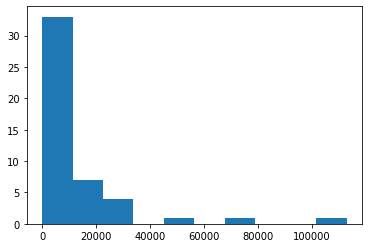

In [337]:
 plt.hist(x = df["Hispanic_confirmed"])

(array([22., 11.,  6.,  3.,  1.,  1.,  0.,  0.,  2.,  1.]),
 array([  1220. ,  33178.4,  65136.8,  97095.2, 129053.6, 161012. ,
        192970.4, 224928.8, 256887.2, 288845.6, 320804. ]),
 <a list of 10 Patch objects>)

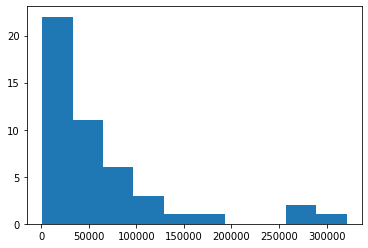

In [338]:
 plt.hist(x = df['Total_confirmed'])

In [339]:
x = df[['Hispanic_confirmed']]
y = df[['Total_confirmed']]


In [340]:
x.columns

Index(['Hispanic_confirmed'], dtype='object')

In [341]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[4.84600e+03]
 [8.70000e+01]
 [2.85140e+04]
 [6.85100e+03]
 [1.12854e+05]
 [1.26040e+04]
 [8.97300e+03]
 [3.44700e+03]
 [6.94730e+04]
 [1.71790e+04]
 [0.00000e+00]
 [2.09100e+03]
 [4.89990e+04]
 [5.80500e+03]
 [7.77900e+03]
 [6.89200e+03]
 [2.10100e+03]
 [1.38000e+02]
 [1.94520e+04]
 [2.18030e+04]
 [6.14200e+03]
 [8.93900e+03]
 [1.63600e+03]
 [4.18000e+03]
 [9.90000e+01]
 [9.00000e+03]
 [6.12900e+03]
 [5.87000e+02]
 [3.19460e+04]
 [5.20200e+03]
 [2.49990e+04]
 [4.70200e+03]
 [4.18900e+03]
 [4.20800e+03]
 [7.40000e+03]
 [5.89900e+03]
 [5.30500e+03]
 [1.12600e+03]
 [1.38460e+04]
 [1.00900e+04]
 [1.20720e+04]
 [4.40000e+01]
 [2.33430e+04]
 [1.22950e+04]
 [0.00000e+00]
 [1.07790e+04]
 [2.36000e+02]]


In [342]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[ 53587.]
 [  1479.]
 [122467.]
 [ 28367.]
 [320804.]
 [ 36913.]
 [ 47287.]
 [ 12804.]
 [269811.]
 [116926.]
 [  1220.]
 [ 10902.]
 [155048.]
 [ 51612.]
 [ 35712.]
 [ 18611.]
 [ 19389.]
 [  3539.]
 [ 73109.]
 [111597.]
 [ 76776.]
 [ 42281.]
 [ 35419.]
 [ 27433.]
 [  1758.]
 [ 21172.]
 [ 27683.]
 [  6054.]
 [175298.]
 [ 15028.]
 [ 85701.]
 [ 65592.]
 [ 20235.]
 [ 11454.]
 [ 92148.]
 [ 17312.]
 [ 56648.]
 [  7499.]
 [ 61960.]
 [258658.]
 [ 29484.]
 [  1296.]
 [ 70670.]
 [ 39218.]
 [  4244.]
 [ 39877.]
 [  1862.]]


# Train Test and Split the data

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [345]:
from sklearn.linear_model import LinearRegression

In [346]:
lm = LinearRegression()

In [347]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [348]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.82984395]]


# Predicting Test Data

In [349]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

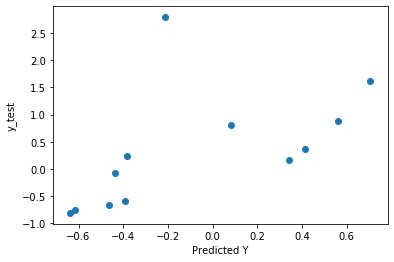

In [350]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the Model

In [351]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5744621719910393
MSE: 0.9342131203971419
RMSE: 0.9665470088915189


# Residuals

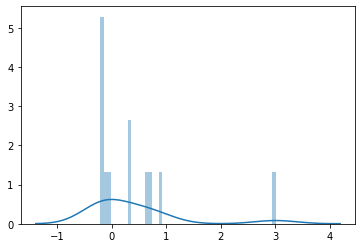

In [352]:
sns.distplot((y_test-predictions),bins=51);

In [353]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Hispanic_confirmed,0.829844


# Linear Regression Model for Asian race

In [354]:
 df=df.astype({'Asian_confirmed': 'int32', 'Asian_confirmed': 'int32'})

(array([32., 11.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([    0. ,  1247.3,  2494.6,  3741.9,  4989.2,  6236.5,  7483.8,
         8731.1,  9978.4, 11225.7, 12473. ]),
 <a list of 10 Patch objects>)

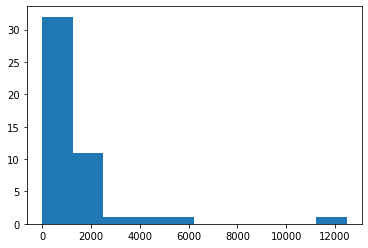

In [356]:
 plt.hist(x = df["Asian_confirmed"])

(array([22., 11.,  6.,  3.,  1.,  1.,  0.,  0.,  2.,  1.]),
 array([  1220. ,  33178.4,  65136.8,  97095.2, 129053.6, 161012. ,
        192970.4, 224928.8, 256887.2, 288845.6, 320804. ]),
 <a list of 10 Patch objects>)

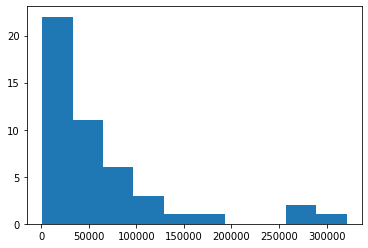

In [357]:
plt.hist(x= df["Total_confirmed"])

In [358]:
x = df[['Asian_confirmed']]
y = df[['Total_confirmed']]

In [359]:
x.columns

Index(['Asian_confirmed'], dtype='object')

In [360]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[2.1600e+02]
 [6.3000e+01]
 [9.1300e+02]
 [3.9500e+02]
 [1.2473e+04]
 [7.8300e+02]
 [6.8400e+02]
 [1.8200e+02]
 [0.0000e+00]
 [1.5420e+03]
 [3.4000e+02]
 [9.5000e+01]
 [4.3170e+03]
 [7.3800e+02]
 [2.1210e+03]
 [8.1700e+02]
 [4.6100e+02]
 [8.4000e+01]
 [1.4260e+03]
 [2.3340e+03]
 [1.6300e+03]
 [2.9330e+03]
 [1.1100e+02]
 [0.0000e+00]
 [2.0000e+00]
 [1.2000e+03]
 [1.1640e+03]
 [1.5300e+02]
 [5.2380e+03]
 [1.0500e+02]
 [1.1310e+03]
 [1.9040e+03]
 [1.4080e+03]
 [3.9400e+02]
 [1.3000e+03]
 [0.0000e+00]
 [4.0300e+02]
 [7.1500e+02]
 [7.1000e+02]
 [6.4100e+02]
 [6.5000e+02]
 [5.3000e+01]
 [2.2750e+03]
 [1.5450e+03]
 [0.0000e+00]
 [1.3820e+03]
 [9.0000e+00]]


In [361]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[ 53587.]
 [  1479.]
 [122467.]
 [ 28367.]
 [320804.]
 [ 36913.]
 [ 47287.]
 [ 12804.]
 [269811.]
 [116926.]
 [  1220.]
 [ 10902.]
 [155048.]
 [ 51612.]
 [ 35712.]
 [ 18611.]
 [ 19389.]
 [  3539.]
 [ 73109.]
 [111597.]
 [ 76776.]
 [ 42281.]
 [ 35419.]
 [ 27433.]
 [  1758.]
 [ 21172.]
 [ 27683.]
 [  6054.]
 [175298.]
 [ 15028.]
 [ 85701.]
 [ 65592.]
 [ 20235.]
 [ 11454.]
 [ 92148.]
 [ 17312.]
 [ 56648.]
 [  7499.]
 [ 61960.]
 [258658.]
 [ 29484.]
 [  1296.]
 [ 70670.]
 [ 39218.]
 [  4244.]
 [ 39877.]
 [  1862.]]


# Train Test and Split the data

In [362]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [363]:
lm = LinearRegression()

In [364]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [365]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.63876029]]


# Predicting Test Data

In [366]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

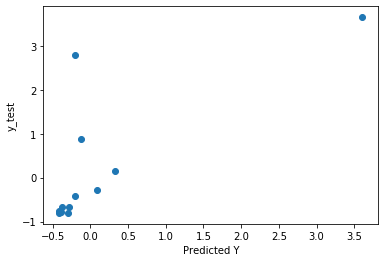

In [367]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating The Model

In [368]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5952334306442756
MSE: 0.9290836498823022
RMSE: 0.96388985360481


# Residuals

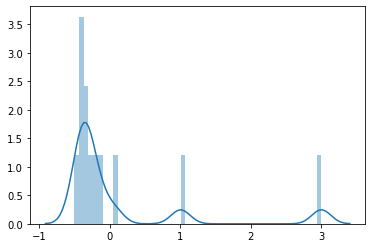

In [369]:
sns.distplot((y_test-predictions),bins=51);

In [370]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Asian_confirmed,0.63876


# Linear Regression Model for American Indian and Alaska Native

In [390]:
df=df.astype({'American Indian and Alaska Native_confirmed': 'int32', 'American Indian and Alaska Native_confirmed': 'int32'})

(array([42.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([   0. ,  778.3, 1556.6, 2334.9, 3113.2, 3891.5, 4669.8, 5448.1,
        6226.4, 7004.7, 7783. ]),
 <a list of 10 Patch objects>)

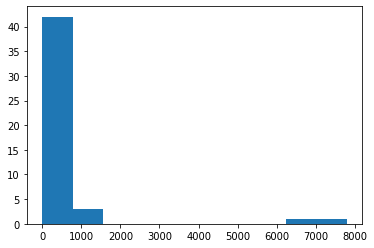

In [392]:
plt.hist(x = df['American Indian and Alaska Native_confirmed'])

(array([22., 11.,  6.,  3.,  1.,  1.,  0.,  0.,  2.,  1.]),
 array([  1220. ,  33178.4,  65136.8,  97095.2, 129053.6, 161012. ,
        192970.4, 224928.8, 256887.2, 288845.6, 320804. ]),
 <a list of 10 Patch objects>)

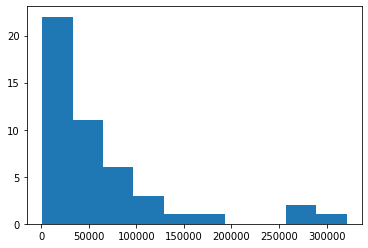

In [393]:
 plt.hist(x = df["Total_confirmed"])

In [394]:
x = df[['American Indian and Alaska Native_confirmed']]
y = df[['Total_confirmed']]

In [395]:
x.columns

Index(['American Indian and Alaska Native_confirmed'], dtype='object')

In [396]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)


[[0.000e+00]
 [1.770e+02]
 [7.783e+03]
 [7.400e+01]
 [4.460e+02]
 [1.830e+02]
 [4.500e+01]
 [0.000e+00]
 [0.000e+00]
 [6.700e+01]
 [0.000e+00]
 [9.500e+01]
 [2.260e+02]
 [0.000e+00]
 [3.530e+02]
 [1.220e+02]
 [6.700e+01]
 [6.000e+00]
 [0.000e+00]
 [0.000e+00]
 [2.960e+02]
 [3.450e+02]
 [1.105e+03]
 [0.000e+00]
 [1.870e+02]
 [2.430e+02]
 [8.700e+01]
 [0.000e+00]
 [0.000e+00]
 [6.661e+03]
 [6.520e+02]
 [7.800e+01]
 [1.429e+03]
 [2.620e+02]
 [0.000e+00]
 [0.000e+00]
 [0.000e+00]
 [1.206e+03]
 [7.800e+01]
 [0.000e+00]
 [6.860e+02]
 [2.000e+00]
 [8.400e+01]
 [4.570e+02]
 [0.000e+00]
 [3.610e+02]
 [3.370e+02]]


In [397]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[ 53587.]
 [  1479.]
 [122467.]
 [ 28367.]
 [320804.]
 [ 36913.]
 [ 47287.]
 [ 12804.]
 [269811.]
 [116926.]
 [  1220.]
 [ 10902.]
 [155048.]
 [ 51612.]
 [ 35712.]
 [ 18611.]
 [ 19389.]
 [  3539.]
 [ 73109.]
 [111597.]
 [ 76776.]
 [ 42281.]
 [ 35419.]
 [ 27433.]
 [  1758.]
 [ 21172.]
 [ 27683.]
 [  6054.]
 [175298.]
 [ 15028.]
 [ 85701.]
 [ 65592.]
 [ 20235.]
 [ 11454.]
 [ 92148.]
 [ 17312.]
 [ 56648.]
 [  7499.]
 [ 61960.]
 [258658.]
 [ 29484.]
 [  1296.]
 [ 70670.]
 [ 39218.]
 [  4244.]
 [ 39877.]
 [  1862.]]


# Train Test and Split the data

In [398]:
from sklearn.model_selection import train_test_split

In [399]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [400]:
from sklearn.linear_model import LinearRegression

In [401]:
lm = LinearRegression()

In [402]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Print out the coefficients of the model

In [403]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-0.16705582]]


# Predicting Test Data

In [404]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

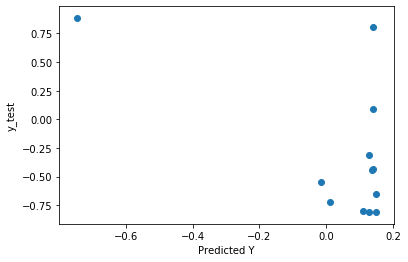

In [405]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the Model

In [407]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7346698820326516
MSE: 0.6713731309828109
RMSE: 0.8193736211172599


# Residuals

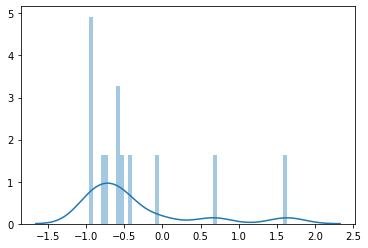

In [408]:
sns.distplot((y_test-predictions),bins=51);

In [409]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
American Indian and Alaska Native_confirmed,-0.167056


# Linear Regression Model for Native Hawaiian and Other Pacific Islander

In [425]:
df=df.astype({'Native Hawaiian and Other Pacific Islander_confirmed': 'int32', 'Native Hawaiian and Other Pacific Islander_confirmed': 'int32'})

(array([38.,  3.,  2.,  0.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([   0. ,  174.3,  348.6,  522.9,  697.2,  871.5, 1045.8, 1220.1,
        1394.4, 1568.7, 1743. ]),
 <a list of 10 Patch objects>)

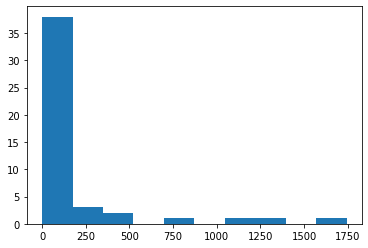

In [426]:
 plt.hist(x = df["Native Hawaiian and Other Pacific Islander_confirmed"])

(array([22., 11.,  6.,  3.,  1.,  1.,  0.,  0.,  2.,  1.]),
 array([  1220. ,  33178.4,  65136.8,  97095.2, 129053.6, 161012. ,
        192970.4, 224928.8, 256887.2, 288845.6, 320804. ]),
 <a list of 10 Patch objects>)

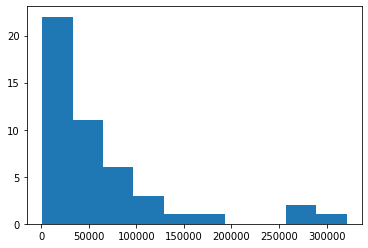

In [427]:
plt.hist(x = df["Total_confirmed"])

In [428]:
x = df[['Native Hawaiian and Other Pacific Islander_confirmed']]
y = df[['Total_confirmed']]


In [429]:
x.columns

Index(['Native Hawaiian and Other Pacific Islander_confirmed'], dtype='object')

In [430]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[   0.]
 [  39.]
 [   0.]
 [1743.]
 [1243.]
 [ 118.]
 [   0.]
 [   0.]
 [   0.]
 [ 108.]
 [ 346.]
 [  36.]
 [ 385.]
 [   0.]
 [ 353.]
 [   0.]
 [  35.]
 [   2.]
 [   0.]
 [   0.]
 [   0.]
 [  94.]
 [   0.]
 [   0.]
 [   0.]
 [  32.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [ 186.]
 [ 125.]
 [   0.]
 [ 327.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [  56.]
 [   0.]
 [1141.]
 [   0.]
 [   0.]
 [ 838.]
 [   0.]
 [   0.]
 [   4.]]


In [431]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[ 53587.]
 [  1479.]
 [122467.]
 [ 28367.]
 [320804.]
 [ 36913.]
 [ 47287.]
 [ 12804.]
 [269811.]
 [116926.]
 [  1220.]
 [ 10902.]
 [155048.]
 [ 51612.]
 [ 35712.]
 [ 18611.]
 [ 19389.]
 [  3539.]
 [ 73109.]
 [111597.]
 [ 76776.]
 [ 42281.]
 [ 35419.]
 [ 27433.]
 [  1758.]
 [ 21172.]
 [ 27683.]
 [  6054.]
 [175298.]
 [ 15028.]
 [ 85701.]
 [ 65592.]
 [ 20235.]
 [ 11454.]
 [ 92148.]
 [ 17312.]
 [ 56648.]
 [  7499.]
 [ 61960.]
 [258658.]
 [ 29484.]
 [  1296.]
 [ 70670.]
 [ 39218.]
 [  4244.]
 [ 39877.]
 [  1862.]]


# Train Test and Split the data

In [432]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Creating and Training the Model

In [433]:
lm = LinearRegression()

In [434]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [435]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.16959752]]


# Predicting Test Data

In [436]:
predictions = lm.predict(x_test)

Text(0, 0.5, 'y_test')

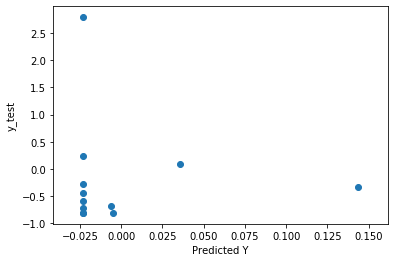

In [437]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating The Model

In [438]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7158736933468209
MSE: 0.9677202772331704
RMSE: 0.9837277454830531


# Residuals

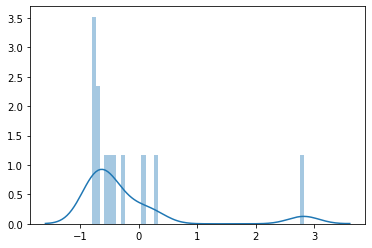

In [439]:
sns.distplot((y_test-predictions),bins=51);

In [440]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecients']
coeffecients

,Coeffecients
Native Hawaiian and Other Pacific Islander_confirmed,0.169598
